In [1]:
#!pip install --no-deps monai -q
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seismic-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_forward
import seis_nn
import seis_test
import seis_prior
import seis_invert
import seis_model

Mismatch to hosts: 3.544453883175856e-05
adjoint 5.346471963069144e-18 4.9042632427831433e-05
diff 1.574739655544795e-13 1.658886008067652e-07
Mismatch to hosts: 1.5741465383079042e-05
adjoint 8.592302216947623e-18 0.0001352831488805387
diff 1.1770732250346666e-13 1.4481413612063529e-07
8.23042934313816e-16 1.0896616942090986e-11
All tests passed!


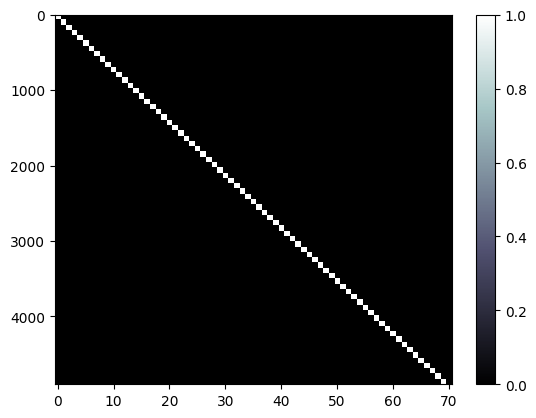

In [2]:
import seis_test
seis_test.run_all_tests()

In [3]:
model = seis_model.default_model()
data = kgs.load_all_train_data()
data = data[::1000]

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\bartley_unet2d_convnext_seed1_epochbest_FT.pth
Replacing all activations with GELU...
Replacing all norms with InstanceNorm...
Replacing forward functions...
Loading:  F:/seismic/models/brendan\bartley_unet2d_convnext_seed2_epochbest_FT.pth
Replacing all activations with GELU...
Replacing all norms with InstanceNorm...
Replacing forward functions...
n_models: 2


In [4]:
data_out=model.models[0].infer(data)
kgs.score_metric(data_out);

         family      score
0  CurveFault_A   8.354316
1  CurveFault_B  74.039184
2    CurveVel_A   9.733469
3    CurveVel_B  53.315714
4   FlatFault_A   2.180591
5   FlatFault_B  18.583265
6     FlatVel_A   1.857347
7     FlatVel_B   2.456327
8       Style_A  35.804415
9       Style_B  63.399465
Combined:  26.972409403898276


In [5]:
data_out=model.infer(data)
kgs.score_metric(data_out)

Processing: 100%|██████████████████████████████████████████████████████████████████████| 10/10 [03:05<00:00, 18.59s/it]

         family      score
0  CurveFault_A   8.354316
1  CurveFault_B  74.039184
2    CurveVel_A   9.733469
3    CurveVel_B  53.315714
4   FlatFault_A   2.180591
5   FlatFault_B  18.583265
6     FlatVel_A   0.082095
7     FlatVel_B   0.062431
8       Style_A  35.804415
9       Style_B  63.399465
Combined:  26.555494694546162


(26.555494694546162,
          family      score
 0  CurveFault_A   8.354316
 1  CurveFault_B  74.039184
 2    CurveVel_A   9.733469
 3    CurveVel_B  53.315714
 4   FlatFault_A   2.180591
 5   FlatFault_B  18.583265
 6     FlatVel_A   0.082095
 7     FlatVel_B   0.062431
 8       Style_A  35.804415
 9       Style_B  63.399465,
 [8.354316256776148,
  74.03918367346938,
  9.733469387755102,
  53.315714285714286,
  2.1805908701371175,
  18.58326530612245,
  0.0820952973778341,
  0.06243107848877116,
  35.804415432676976,
  63.39946535694356])